In [ ]:
# Run this command to install sklearn:
# Instalar sklearn:
#!pip install sklearn

# Run this command to install seaborn:
# Instalar seaborn:
#!pip install seaborn

In [57]:
# Necessary imports
# Imports necessarios
from sklearn import datasets
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
# Load the data from sklearn dataset
# Carregar a data inicial do sklearn dataset
boston_initial_data = datasets.load_boston()

# Print the description of the data
# Print a descricao da data
print(boston_initial_data.DESCR)

In [ ]:
# Print the feature names (possible columns in the future)
# Print as feature names (possivelmente serao colunas depois)
print(boston_initial_data.feature_names)
# We can see from the print statement that the 'MEDV' col is missing
# Podemos ver que a coluna 'MEDV' nao esta nos feature names

# Print all keys of the dataset for further exploration
# Print todas as keys do dataset para explorar a data
print(boston_initial_data.keys())

# !!! The 'target' key corresponds to the missing MEDV col !!!
# !!! A key 'target' corresponde a coluna MEDV !!!

In [32]:
# Create a pandas df with the dataset
# Criar um pandas df com o dataset original
boston_df = pd.DataFrame(boston_initial_data.data, columns=boston_initial_data.feature_names)

# Add the target col as MEDV
# Adicionar a coluna target como MEDV
boston_df['MEDV'] = boston_initial_data.target

In [33]:
# Check the first 5 rows from the df
# Verificar as primeiras filas do df
boston_df.head()

# !!! DATA  OK !!!

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
# Second check - null values
# Segunda verificacao - valores nulos
boston_df.isnull().sum()

# !!! DATA OK !!!

Now that we've checked that the data OK, we can explore it.

Agora que verificamos que a data esta OK, podemos comecar a explorar o dataset.

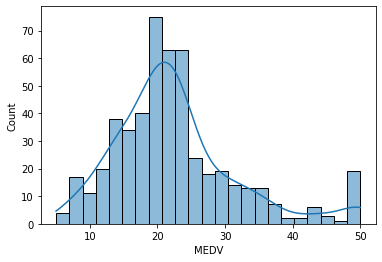

In [59]:
# Using seaborn histplot (kde=true gives us the curve)
# Usando seaborn histplot (kde=true inclui a curva no grafico)
sns.histplot(boston_df['MEDV'], kde=True)

# We can see that there is a normal distribution with outliers
# Podemos ver que existe uma distribuicao normal com valores atipicos

Since we have so many possible variables for our linear regression model, we should create a correlation matrix to check which variable has the highest positive correlation and lowest negative correlation with out target (MEDV).

Como temos tantas variaveis possiveis para o modelo de regressao linear, 
podemos criar uma matriz de correlacao para verificar as variaveis e encontrar
a variavel com a maior correlacao positiva e menor correlacao negativa em relacao ao target (MEDV).

In [72]:
# Create a correlation matrix
# Matriz de correlacao
correlation = boston_df.corr()

# Print the correlations between all vars and MEDV (sorted)
# Print as correlacoes entre as variaveis e MEDV (em ordem)
print(correlation['MEDV'].sort_values(ascending=False))

# !!! HIGHEST - RM /// LOWEST - LSTAT !!!
# !!! MAIOR - RM /// MENOR - LSTAT !!!

MEDV       1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64
